# Delaunay Triangulation test

This is a notebook for visualization of data and testing delaunay code.
To compare the delaunay resulty first we use the geopandas library and libpysal.g to create voronoi frames.
We compare the results with voronoi frame created with bower-watson and Dwyer's algorithm.

In [1]:
import sys
sys.executable

'/home/parisha/anaconda3/envs/ads/bin/python'

In [2]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
df = pd.read_csv('Data/data.csv',
                 sep=',', header=0)
print(df)
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   
states =gpd.read_file("Data/tl_2019_45_tract.shp")
states

   station             valid      lon      lat  tmpf
0      GGE  2022-01-01 00:15 -79.3196  33.3117  68.0
1      CDN  2022-01-01 00:15 -80.5649  34.2836  66.2
2      BNL  2022-01-01 00:15 -81.3883  33.2578  71.6
3      EOE  2022-01-01 00:15 -81.6397  34.3093  68.0
4      DYB  2022-01-01 00:15 -80.2793  33.0634  68.0
5      FDW  2022-01-01 00:15 -81.1088  34.3155  64.4
6      AIK  2022-01-01 00:15 -81.6850  33.6494  69.3
7      35A  2022-01-01 00:15 -81.6412  34.6870  64.8
8      ARW  2022-01-01 00:15 -80.6344  32.4122  64.4
9      AQX  2022-01-01 00:15 -81.2703  32.9951  71.6
10     HVS  2022-01-01 00:15 -80.1192  34.4031  66.2
11     BBP  2022-01-01 00:15 -79.7344  34.6217  66.2
12     CQW  2022-01-01 00:15 -79.9570  34.7129  68.0
13     CKI  2022-01-01 00:15 -79.8570  33.7172  64.4
14     JZI  2022-01-01 00:15 -80.0029  32.7009  68.0
15     HXD  2022-01-01 00:15 -80.6975  32.2244  68.0
16     HYW  2022-01-01 00:15 -79.1222  33.8285  62.6
17     LKR  2022-01-01 00:15 -80.8544  34.7230

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,45,041,001505,45041001505,15.05,Census Tract 15.05,G5020,S,43397363,0,+34.0897395,-079.7823755,"POLYGON ((-79.82185 34.09766, -79.82183 34.097..."
1,45,003,022100,45003022100,221,Census Tract 221,G5020,S,120040659,1729890,+33.3147374,-081.8384557,"POLYGON ((-81.88627 33.34921, -81.88618 33.349..."
2,45,041,980100,45041980100,9801,Census Tract 9801,G5020,S,5694867,0,+34.1865644,-079.7259342,"POLYGON ((-79.74243 34.18717, -79.74234 34.188..."
3,45,045,002805,45045002805,28.05,Census Tract 28.05,G5020,S,9368504,91767,+34.8495102,-082.2900591,"POLYGON ((-82.32147 34.85500, -82.32102 34.855..."
4,45,013,000902,45013000902,9.02,Census Tract 9.02,G5020,S,32261422,5832795,+32.4453561,-080.6342550,"POLYGON ((-80.66903 32.42717, -80.66847 32.427..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,45,051,980100,45051980100,9801,Census Tract 9801,G5020,S,6676775,0,+33.6782314,-078.9302466,"POLYGON ((-78.94413 33.68335, -78.94410 33.683..."
1099,45,053,950202,45053950202,9502.02,Census Tract 9502.02,G5020,S,267129157,15507412,+32.5364880,-080.8861724,"POLYGON ((-81.01757 32.49663, -81.01746 32.496..."
1100,45,053,950201,45053950201,9502.01,Census Tract 9502.01,G5020,S,232020716,2959622,+32.3984799,-080.9415727,"POLYGON ((-81.03196 32.43408, -81.03177 32.434..."
1101,45,041,000700,45041000700,7,Census Tract 7,G5020,S,5887872,0,+34.1875889,-079.7527189,"POLYGON ((-79.76723 34.18374, -79.76660 34.183..."


## Plot weather stations in South Carolina :

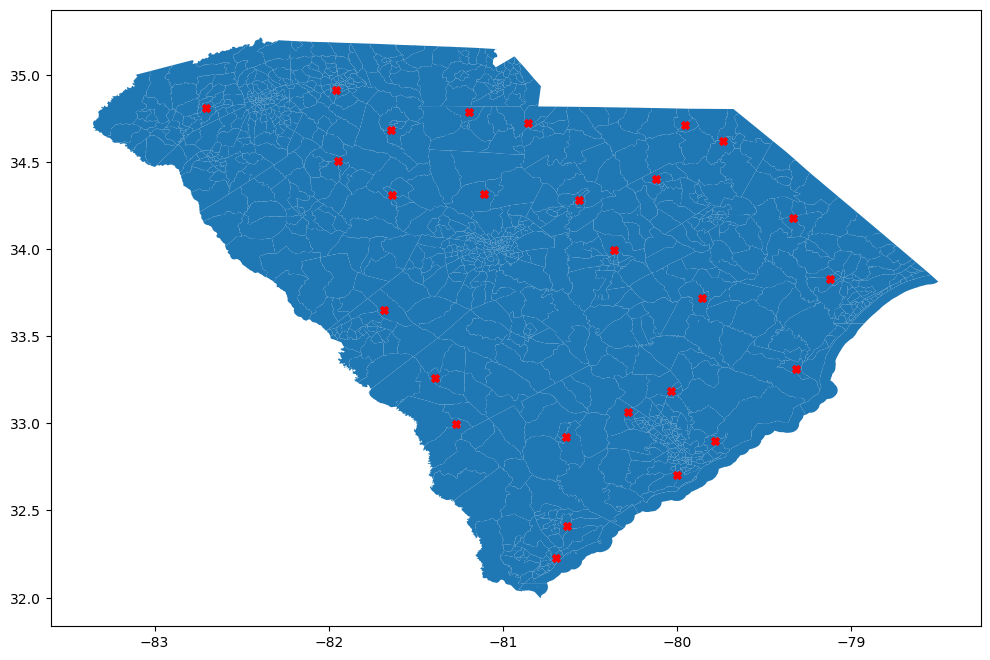

In [4]:
gdf.plot(ax=states.plot(figsize=(12, 12)),marker='X', color='red', markersize=30);

## Plot Delaunay Triangles for reference with libpysal library:

/home/parisha/anaconda3/envs/ads/lib/python3.7/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


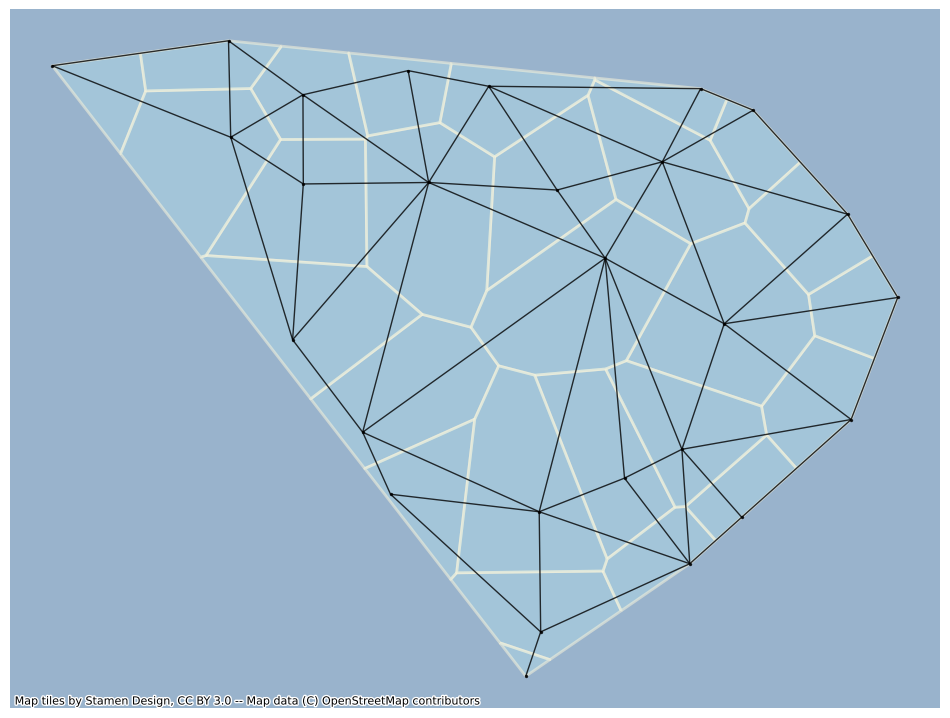

In [5]:
temp_data = gpd.read_file("Data/data.csv")
coordinates = np.column_stack((np.asarray(temp_data.lon,dtype=np.float32), np.asarray(temp_data.lat,dtype=np.float32)))
regions, points = voronoi_frames(coordinates, clip="convex hull")
delaunay = weights.Rook.from_dataframe(regions)
delaunay_graph = delaunay.to_networkx()
positions = dict(zip(delaunay_graph.nodes, coordinates))
ax = regions.plot(facecolor="lightblue", alpha=0.50, edgecolor="cornsilk", linewidth=2,figsize=(12,12))
add_basemap(ax)
ax.axis("off")
nx.draw(
    delaunay_graph,
    positions,
    ax=ax,
    node_size=2,
    node_color="k",
    edge_color="k",
    alpha=0.8,
)
plt.show()

# Test 1 

## Bowyer- Watson Algorithm : 

In [6]:
import pygame
import pygame.gfxdraw
import math
import random
import sys
import time
coord= coordinates
coord
t=time.time()

pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
# Normaliza the lattitude and longitude data saperately to fit the pygame window.
lon_max = np.amax(coord,axis=0)[0]
lat_max = np.amax(coord,axis=0)[1]
lon_min = np.amin(coord,axis=0)[0]
lat_min = np.amin(coord,axis=0)[1]
coordinate_normal = []
for crd in coordinates:
    x =  500* (crd[0] - lon_min)/(lon_max - lon_min)
    y = 500- 500* (crd[1] - lat_min)/(lat_max - lat_min)
    coordinate_normal.append([x,y])

coordinate_normal

[[472.43517354526665, 297.9973295837893],
 [298.5447339824857, 117.43382073626378],
 [183.56806511409883, 308.01068166484293],
 [148.46270214987322, 112.65924695396791],
 [338.4260541623165, 344.1272104639494],
 [222.5960411650651, 111.50759452763117],
 [142.13772825091087, 235.25814023370395],
 [148.2538938486779, 42.48853308537963],
 [288.8404747192807, 465.1095380917013],
 [200.04474463597043, 356.81664842921697],
 [360.7813265719217, 95.2327967932327],
 [414.51430763002577, 54.62021692170748],
 [383.4306351607611, 37.67710642544097],
 [397.39415762896044, 222.66154317172874],
 [377.02149873223533, 411.47371822856724],
 [280.02897747853325, 500.0],
 [500.0, 201.98424397738933],
 [258.1200860801568, 35.80044450240109],
 [210.44787249909444, 23.4830788594885],
 [0.0, 19.63691411011638],
 [407.74188737135916, 374.8929849129988],
 [470.3268489122792, 136.45841011016176],
 [105.52489719387212, 75.91125827063621],
 [372.3712526367375, 321.44284685644953],
 [104.22623740225428, 0.0],
 [326

In [8]:
pygame.init()

def circumcenter(a, b, c):
    ad = a[0] * a[0] + a[1] * a[1]
    bd = b[0] * b[0] + b[1] * b[1]
    cd = c[0] * c[0] + c[1] * c[1]
    D = 2 * (a[0] * (b[1] - c[1]) + b[0] * (c[1] - a[1]) + c[0] * (a[1] - b[1]))
    return pygame.Vector2((1 / D * (ad * (b[1] - c[1]) + bd * (c[1] - a[1]) + cd * (a[1] - b[1])),
                           1 / D * (ad * (c[0] - b[0]) + bd * (a[0] - c[0]) + cd * (b[0] - a[0]))))

def LineIsEqual(line1,line2):
    if (line1[0] == line2[0] and line1[1] == line2[1]) or (line1[0] == line2[1] and line1[1] == line2[0]):
        return True
    return False

def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

class Triangle:
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
        self.edges = [[self.a,self.b],
                      [self.b,self.c],
                      [self.c,self.a]]
        self.circumcenter = circumcenter(a,b,c)
    def IsPointInCircumcircle(self,point):
        if (self.a.distance_to(self.circumcenter) > point.distance_to(self.circumcenter)):
            return True
        return False
    def HasVertex(self,point):
        if (self.a == point) or (self.b == point) or (self.c == point):
            return True
        return False
    def Show(self,screen,colour):
        for edge in self.edges:
            pygame.draw.aaline(screen,colour,edge[0],edge[1])


def DelaunayTriangulation(points,width,height):

    triangulation = []
    superTriangleA = pygame.Vector2(-100,-100)
    superTriangleB = pygame.Vector2(2*width+100,-100)
    superTriangleC = pygame.Vector2(-100,2*height+100)
    superTriangle = Triangle(superTriangleA,superTriangleB,superTriangleC)
    triangulation.append(superTriangle)

    for point in points:

        badTriangles = []
        for triangle in triangulation:
            if triangle.IsPointInCircumcircle(point):
                badTriangles.append(triangle)

        polygon = []
        for triangle in badTriangles:
            for triangleEdge in triangle.edges:
                isShared = False
                for other in badTriangles:
                    if triangle == other:
                        continue
                    for otherEdge in other.edges:
                        if LineIsEqual(triangleEdge,otherEdge):
                            isShared = True
                if isShared == False:
                    polygon.append(triangleEdge)

        for badTriangle in badTriangles:
            triangulation.remove(badTriangle)

        for edge in polygon:
            newTriangle = Triangle(edge[0],edge[1],point)
            triangulation.append(newTriangle)
     
    onSuper = lambda triangle : triangle.HasVertex(superTriangleA) or triangle.HasVertex(superTriangleB) or triangle.HasVertex(superTriangleC)
    for triangle in triangulation[:]:
        if onSuper(triangle):
            triangulation.remove(triangle)
    
    return triangulation

def mainBowyer():
    background = 255,255,255
    white = 0,0,0
    width = int(510)
    height = int(510)
    amount = int(100)

    screen = pygame.display.set_mode((width,height))
    screen.fill(background)



    points = []
    for i in range(len(coordinates)):
        x = coordinate_normal[i][0]
        y = coordinate_normal[i][1]
        points.append(pygame.Vector2(x,y))

    delaunay = DelaunayTriangulation(points,width,height)
    for triangle in delaunay:
        triangle.Show(screen,white)
    pygame.display.set_caption("Bowyer-Watson Method")
    pygame.display.update()
    run =True
    while run :
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

    pygame.image.save(screen, "BowyerWatson_result.jpg")
    pygame.quit()
    exit()



# Test 2

## Dwyer's Divide and Conquer method:

In [9]:
import numpy as np
import pygame
from   pygame.locals import *
edges = [] 
SCREEN_W        = 500
SCREEN_H        = 500
SCREEN_MODE     = 0
DRAW_LABELS     = False
BG_COLOR        = 255,255,255
CROSS_SIZE      = 5
CROSS_COLOR     = (0,0,0)
COLOR_KEY       = (250,250,250)
TEXT_COLOR      = (100, 100, 100)
LINE_COLOR      = (0, 0, 0)
RND_SEED        = 0
RND_POINTS      = 10
GRID_CELLS      = 10
CRCL_POINTS     = 30


def delaunay(S):
   
    if len(S) < 2:
        print("Must be at least two points.")
        return
    
    global edges
    edges = []
    S = np.asarray(S, dtype=np.float64)
    
    # Sort points by x coordinate, y is a tiebreaker.
    S.view(dtype=[('f0', S.dtype), ('f1', S.dtype)]).sort(order=['f0', 'f1'], axis=0)
    
    # Remove duplicates.
    dupes = [i for i in range(1, len(S)) if S[i-1][0] == S[i][0] and S[i-1][1] == S[i][1]]
    if dupes:
        S = np.delete(S, dupes, 0)

    triangulate(S)
    edges = [e for e in edges if e.data is None]  # clean the garbage
    return edges



class Edge:

    def __init__(self, org, dest):
        self.org   = org
        self.dest  = dest
        self.onext = None
        self.oprev = None
        self.sym   = None    
        self.data  = None    

    def __str__(self):
        s = str(self.org) + ', ' + str(self.dest)
        if self.data is None:
            return s
        else:
            return s + ' ' + str(self.data)



def triangulate(S):
    if len(S) == 2:
        a = make_edge(S[0], S[1])
        return a, a.sym

    elif len(S) == 3:
        p1, p2, p3 = S[0], S[1], S[2]
        a = make_edge(p1, p2)
        b = make_edge(p2, p3)
        splice(a.sym, b)

        if right_of(p3, a):
            connect(b, a)
            return a, b.sym
        elif left_of(p3, a):
            c = connect(b, a)
            return c.sym, c
        else:  
            return a, b.sym

    else:
        m = (len(S) + 1) // 2
        L, R = S[:m], S[m:]
        ldo, ldi = triangulate(L)
        rdi, rdo = triangulate(R)

        while True:
            if right_of(rdi.org, ldi):
                ldi = ldi.sym.onext
            elif left_of(ldi.org, rdi):
                rdi = rdi.sym.oprev
            else:
                break

        base = connect(ldi.sym, rdi)

        if ldi.org[0] == ldo.org[0] and ldi.org[1] == ldo.org[1]:
            ldo = base
        if rdi.org[0] == rdo.org[0] and rdi.org[1] == rdo.org[1]:
            rdo = base.sym

        while True:
            rcand, lcand = base.sym.onext, base.oprev
            v_rcand, v_lcand = right_of(rcand.dest, base), right_of(lcand.dest, base)
            if not (v_rcand or v_lcand):
                break
            if v_rcand:
                while right_of(rcand.onext.dest, base) and \
                      in_circle(base.dest, base.org, rcand.dest, rcand.onext.dest) == 1:
                    t = rcand.onext
                    delete_edge(rcand)
                    rcand = t
            if v_lcand:
                while right_of(lcand.oprev.dest, base) and \
                      in_circle(base.dest, base.org, lcand.dest, lcand.oprev.dest) == 1:
                    t = lcand.oprev
                    delete_edge(lcand)
                    lcand = t
            
            if not v_rcand or \
               (v_lcand and in_circle(rcand.dest, rcand.org, lcand.org, lcand.dest) == 1):
                base = connect(lcand, base.sym)
            else:
                base = connect(base.sym, rcand.sym)

        return ldo, rdo




def in_circle(a, b, c, d):
    a1, a2 = a[0]-d[0], a[1]-d[1]
    b1, b2 = b[0]-d[0], b[1]-d[1]
    c1, c2 = c[0]-d[0], c[1]-d[1]
    a3, b3, c3 = a1**2 + a2**2, b1**2 + b2**2, c1**2 + c2**2
    det = a1*b2*c3 + a2*b3*c1 + a3*b1*c2 - (a3*b2*c1 + a1*b3*c2 + a2*b1*c3)
    return det < 0


def right_of(p, e):
    a, b = e.org, e.dest
    det = (a[0]-p[0]) * (b[1]-p[1]) - (a[1]-p[1]) * (b[0]-p[0])
    return det > 0


def left_of(p, e):
    a, b = e.org, e.dest
    det = (a[0]-p[0]) * (b[1]-p[1]) - (a[1]-p[1]) * (b[0]-p[0])
    return det < 0

def make_edge(org, dest):

    global edges
    e  = Edge(org, dest)
    es = Edge(dest, org)
    e.sym, es.sym = es, e  
    e.onext, e.oprev = e, e
    es.onext, es.oprev = es, es
    edges.append(e)
    return e

def splice(a, b):

    if a == b:
        print("Splicing edge with itself, ignored: {}.".format(a))
        return

    a.onext.oprev, b.onext.oprev = b, a
    a.onext, b.onext = b.onext, a.onext


def connect(a, b):
    e = make_edge(a.dest, b.org)
    splice(e, a.sym.oprev)
    splice(e.sym, b)
    return e


def delete_edge(e):
    splice(e, e.oprev)
    splice(e.sym, e.sym.oprev)
    e.data, e.sym.data = True, True
    
class Mesh:
    def __init__(self,points):
        np.random.seed(RND_SEED)
        self.points     = points
        self.edges      = None
        self.font_size  = 16
        self.font       = pygame.font.SysFont('Liberation Mono', self.font_size)
        self.cross      = draw_cross()

    def generate(self):
        print(self.points)
        self.edges = delaunay(self.points)
        print(self.edges[0].dest)
        print(self.edges[0].org)
        screen = pygame.display.set_mode((SCREEN_W,SCREEN_H))
        self.draw(screen)

    def draw(self, screen):
        
        screen.fill(BG_COLOR)
        d = self.cross.get_rect().width // 2
        
        for e in self.edges:
            pygame.draw.line(screen, LINE_COLOR, e.org, e.dest)

        for p in self.points:
            point_rect = pygame.Rect(p[0] - d, p[1] - d, p[0] + d, p[1] + d)
            screen.blit(self.cross, point_rect)
            if DRAW_LABELS:
                label = '({}, {})'.format(p[0], p[1])
                text = self.font.render(label, 0, TEXT_COLOR)
                screen.blit(text, (p[0] + 5, p[1] - self.font_size))
        pygame.display.set_caption("Dwyer's Method")
        pygame.image.save(screen, "Dwyer_Algorithm_results.jpg")
        pygame.display.flip()



def draw_cross():
    canvas = pygame.Surface((CROSS_SIZE*2 + 1, CROSS_SIZE*2 + 1))
    canvas.fill(COLOR_KEY)
    canvas.set_colorkey(COLOR_KEY)
    pygame.draw.line(canvas, CROSS_COLOR, [0, CROSS_SIZE], [CROSS_SIZE*2 + 1, CROSS_SIZE])
    pygame.draw.line(canvas, CROSS_COLOR, [CROSS_SIZE, 0], [CROSS_SIZE, CROSS_SIZE*2 + 1])
    return canvas

def gen_random(w, h, n):
    points_x = np.random.randint(0, w, n, dtype=np.int64)
    points_y = np.random.randint(0, h, n, dtype=np.int64)
    return np.asarray(list(zip(points_x, points_y)), dtype=np.float64)

def gen_grid(w, h, n):
    points_x = np.linspace(50, w-50, n+1, dtype=np.float64)
    points_y = np.linspace(50, h-50, n+1, dtype=np.float64)
    return np.asarray(list((i, j) for i in points_x for j in points_y), dtype=np.float64)

def gen_circle(w, h, n):
    rads = np.linspace(0, 2*math.pi, n+1, dtype=np.float64)
    cx, cy = w // 2, h // 2
    r = min(cx, cy) - 50
    return np.asarray(list((cx + r * math.cos(i), cy + r * math.sin(i)) for i in rads)[:-1], dtype=np.float64)

def gen_circle_i(w, h, n):
    rads = np.linspace(0, 2*math.pi, n+1, dtype=np.float64)
    cx, cy = w // 2, h // 2
    r = min(cx, cy) - 50
    return np.asarray(list((int(cx + r * math.cos(i)), int(cy + r * math.sin(i))) for i in rads)[:-1], dtype=np.float64)


def mainDwyer():
    pygame.init()
    pygame.display.set_caption('Delaunay')
    screen_w = SCREEN_W
    screen_h = SCREEN_H
    screen_mode = SCREEN_MODE
    screen = pygame.display.set_mode([screen_w, screen_h], screen_mode)
    screen.fill(BG_COLOR)
    background = screen.copy()
    temp_data = gpd.read_file("Data/data.csv")
    coord = np.column_stack((np.asarray(temp_data.lon,dtype=np.float32), np.asarray(temp_data.lat,dtype=np.float32)))
    lon_max = np.amax(coord,axis=0)[0]
    lat_max = np.amax(coord,axis=0)[1]
    lon_min = np.amin(coord,axis=0)[0]
    lat_min = np.amin(coord,axis=0)[1]
    coordinate_normal = []
    for crd in coord:
        x =  SCREEN_H* (crd[0] - lon_min)/(lon_max - lon_min)
        y = SCREEN_W- SCREEN_W* (crd[1] - lat_min)/(lat_max - lat_min)
        coordinate_normal.append([x,y])
    
    points = []
    for i in range(len(coord)):
        x = coordinate_normal[i][0]
        y = coordinate_normal[i][1]
        points.append(pygame.Vector2(x,y))
        
    mesh = Mesh(points)
    
    mesh.generate()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT or (event.type == KEYDOWN and event.key == K_ESCAPE):
                pygame.quit()
                return
            if event.type == KEYDOWN:
                if event.__dict__['key'] == 32:         # space
                    mesh.generate()
        time.sleep(0.1)
        
#     pygame.display.set_caption("Dwyer's Method")
#     pygame.display.update()
    run =True
    while run :
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

    
    pygame.quit()
    exit()

if __name__ == '__main__':
    t1 = time.time()
    mainBowyer()
    elapsed1 = time.time() - t
    print("Time taken by Bowyer-Watson's method: " + str(elapsed1))
    t2 = time.time()
    mainDwyer()
    elapsed2 = time.time() - t
    print("Time taken by Dwyer's method: " + str(elapsed2))
    

#Results are stored as Dwyer_Algorithm_result.jpg and BowyerWatson_result.jpg in the repository. 
#Pygame cannot show results in jupytor notebook.
    

Time taken by Bowyer-Watson's method: 2.065638542175293
[<Vector2(472.435, 297.997)>, <Vector2(298.545, 117.434)>, <Vector2(183.568, 308.011)>, <Vector2(148.463, 112.659)>, <Vector2(338.426, 344.127)>, <Vector2(222.596, 111.508)>, <Vector2(142.138, 235.258)>, <Vector2(148.254, 42.4885)>, <Vector2(288.84, 465.11)>, <Vector2(200.045, 356.817)>, <Vector2(360.781, 95.2328)>, <Vector2(414.514, 54.6202)>, <Vector2(383.431, 37.6771)>, <Vector2(397.394, 222.662)>, <Vector2(377.021, 411.474)>, <Vector2(280.029, 500)>, <Vector2(500, 201.984)>, <Vector2(258.12, 35.8004)>, <Vector2(210.448, 23.4831)>, <Vector2(0, 19.6369)>, <Vector2(407.742, 374.893)>, <Vector2(470.327, 136.458)>, <Vector2(105.525, 75.9113)>, <Vector2(372.371, 321.443)>, <Vector2(104.226, 0)>, <Vector2(326.976, 171.051)>, <Vector2(287.974, 370.583)>]
[104.2262374   0.       ]
[ 0.         19.63691411]
Time taken by Dwyer's method: 3.4796650409698486
